In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


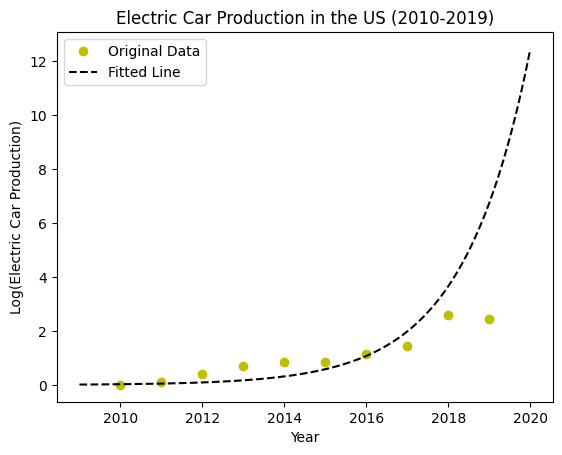

In [121]:
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
production = np.array([0.001, 0.1, 0.4, 0.4*1.75, 0.4*1.75*1.24, 0.4*1.75*1.24*0.97, 0.4*1.75*1.24*0.97*1.36, 
                       0.4*1.75*1.24*0.97*1.36*1.27, 0.4*1.75*1.24*0.97*1.36*1.27*1.79, 0.4*1.75*1.24*0.97*1.36*1.27*1.79*0.94])

fit = np.polyfit(years, np.log(production), 1)
fit_fn = np.poly1d(fit)

x_fit = np.linspace(min(years) - 1, max(years) + 1, 100)

plt.plot(years, production, 'yo', label='Original Data')
plt.plot(x_fit, np.exp(fit_fn(x_fit)), '--k', label='Fitted Line')

plt.xlabel('Year')
plt.ylabel('Log(Electric Car Production)')
plt.title('Electric Car Production in the US (2010-2019)')

plt.legend()
plt.show()

Accuracy: 100.00%


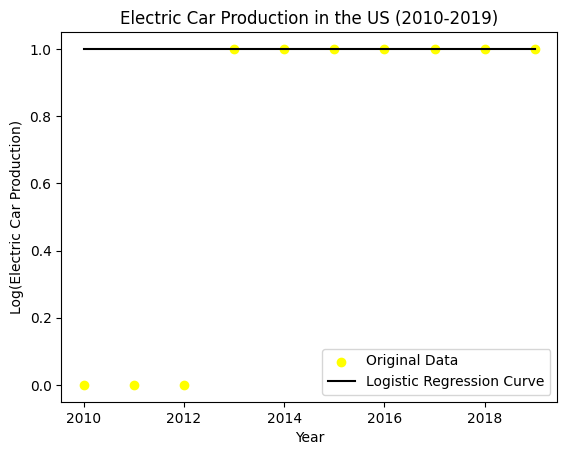

In [122]:
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
production = np.array([0.001, 0.1, 0.4, 0.4*1.75, 0.4*1.75*1.24, 0.4*1.75*1.24*0.97, 0.4*1.75*1.24*0.97*1.36, 
                       0.4*1.75*1.24*0.97*1.36*1.27, 0.4*1.75*1.24*0.97*1.36*1.27*1.79, 0.4*1.75*1.24*0.97*1.36*1.27*1.79*0.94])

years_2d = years.reshape(-1, 1)
production_binary = (production > 0.5).astype(int)
X_train, X_test, y_train, y_test = train_test_split(years_2d, production_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

plt.scatter(years, production_binary, color='yellow', label='Original Data')
plt.plot(years, model.predict_proba(years_2d)[:, 1], color='black', label='Logistic Regression Curve')


plt.xlabel('Year')
plt.ylabel('Log(Electric Car Production)')
plt.title('Electric Car Production in the US (2010-2019)')

plt.legend()
plt.show()